<a href="https://colab.research.google.com/github/riccricc91/Kaggle/blob/master/intel_image_classification_cnn_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        a=1

# Any results you write to the current directory are saved as output.

# Intel Image Classification Tensorflow 2

This tutorial shows how to classify: mountain, sea, forest, street, glacier and buidings

The image classifier has been implemented using tensorflow 2.0

**Import Packages**

In [0]:
try:
  %tensorflow_version 2.x
  print(tf.__version__)
except Exception:
  pass

In [0]:
from pathlib import Path
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, 
                                     MaxPooling2D, Dropout, BatchNormalization)

**Loading the Dataset**

In [0]:
data_dir = Path('../input/intel-image-classification')

In [0]:
train_dir = data_dir / 'seg_train'/'seg_train'

val_dir = data_dir / 'seg_test'/'seg_test'

test_dir = data_dir / 'seg_pred'/'seg_pred'

In [0]:
mountain_dir = train_dir / 'mountain'
sea_dir = train_dir / 'sea'
forest_dir = train_dir / 'forest'
street_dir = train_dir / 'street'
glacier_dir = train_dir / 'glacier'
buildings_dir = train_dir / 'buildings'

In [0]:
mountain_val_dir = val_dir / 'mountain'
sea_val_dir = val_dir / 'sea'
forest_val_dir = val_dir / 'forest'
street_val_dir = val_dir / 'street'
glacier_val_dir = val_dir / 'glacier'
buildings_val_dir = val_dir / 'buildings'

In [0]:
mountain_dir_ = os.path.join(mountain_dir)
mountain_img = os.listdir(mountain_dir_)
sea_dir_ = os.path.join(sea_dir)
sea_img = os.listdir(sea_dir_)
forest_dir_ = os.path.join(forest_dir)
forest_img = os.listdir(forest_dir_)
street_dir_ = os.path.join(street_dir)
street_img = os.listdir(street_dir_)
glacier_dir_ = os.path.join(glacier_dir)
glacier_img = os.listdir(glacier_dir_)
buildings_dir_ = os.path.join(buildings_dir)
buildings_img = os.listdir(buildings_dir_)

In [0]:
mountain_val_dir_ = os.path.join(mountain_val_dir)
mountain_val_img = os.listdir(mountain_val_dir_)
sea_val_dir_ = os.path.join(sea_val_dir)
sea_val_img = os.listdir(sea_val_dir_)
forest_val_dir_ = os.path.join(forest_val_dir)
forest_val_img = os.listdir(forest_val_dir_)
street_val_dir_ = os.path.join(street_val_dir)
street_val_img = os.listdir(street_val_dir_)
glacier_val_dir_ = os.path.join(glacier_val_dir)
glacier_val_img = os.listdir(glacier_val_dir_)
buildings_val_dir_ = os.path.join(buildings_val_dir)
buildings_val_img = os.listdir(buildings_val_dir_)

**Let's explore the dataset**

In [0]:
def plot_imm(dir_img, img_plot, n_img):
  for i in range(n_img):
    img_path = os.path.join(dir_img, img_plot[i]) 
    plt.subplot(2,2,i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

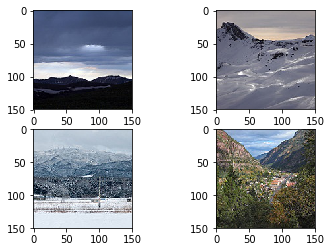

In [0]:
plot_imm(mountain_dir, mountain_img,4)

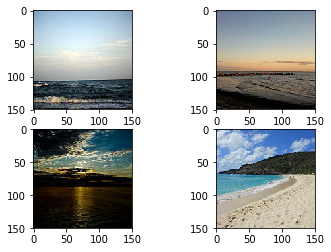

In [0]:
plot_imm(sea_dir, sea_img,4)

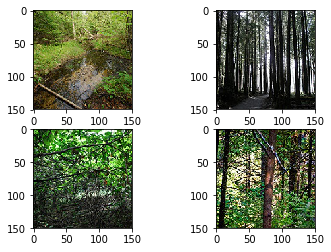

In [0]:
plot_imm(forest_dir, forest_img,4)

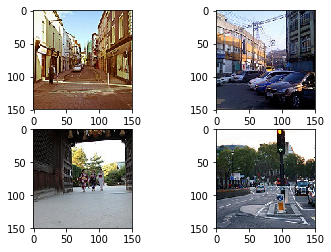

In [0]:
plot_imm(street_dir, street_img,4)

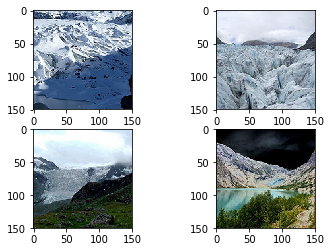

In [0]:
plot_imm(glacier_dir, glacier_img,4)

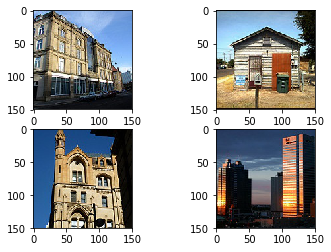

In [0]:
plot_imm(buildings_dir, buildings_img,4)

In [0]:
len_mountain_train   = len(os.listdir(mountain_dir))
len_sea_train        = len(os.listdir(sea_dir))
len_forest_train     = len(os.listdir(forest_dir))
len_street_train     = len(os.listdir(street_dir))
len_glacier_train    = len(os.listdir(glacier_dir))
len_buildings_train  = len(os.listdir(buildings_dir))

len_mountain_val     = len(os.listdir(mountain_val_dir))
len_sea_val          = len(os.listdir(sea_val_dir))
len_forest_val       = len(os.listdir(forest_val_dir))
len_street_val       = len(os.listdir(street_val_dir))
len_glacier_val      = len(os.listdir(glacier_val_dir))
len_buildings_val    = len(os.listdir(buildings_val_dir))

In [0]:
print('total training mountain images:',  len_mountain_train)
print('total training sea images:',       len_sea_train)
print('total training forest images:',    len_forest_train)
print('total training street images:',    len_street_train)
print('total training glacier images:',   len_glacier_train)
print('total training buildings images:', len_buildings_train)

print('total val mountain images:',       len_mountain_val)
print('total val sea images:',            len_sea_val)
print('total val forest images:',         len_forest_val)
print('total val street images:',         len_street_val)
print('total val glacier images:',        len_glacier_val)
print('total val buildings images:',      len_buildings_val)

total training mountain images: 2512
total training sea images: 2274
total training forest images: 2271
total training street images: 2382
total training glacier images: 2404
total training buildings images: 2191
total val mountain images: 525
total val sea images: 510
total val forest images: 474
total val street images: 501
total val glacier images: 553
total val buildings images: 437


In [0]:
d = {'class' : ['mountain','sea', 'forest','street','glacier','buildings'],
     'train': [len_mountain_train, len_sea_train,len_forest_train, len_street_train,len_glacier_train, len_buildings_train], 
     'val': [len_mountain_val, len_sea_val,len_forest_val, len_street_val,len_glacier_val, len_buildings_val]}
data_clas = pd.DataFrame(data=d)
data_clas

,class,train,val
0,mountain,2512,525
1,sea,2274,510
2,forest,2271,474
3,street,2382,501
4,glacier,2404,553
5,buildings,2191,437


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


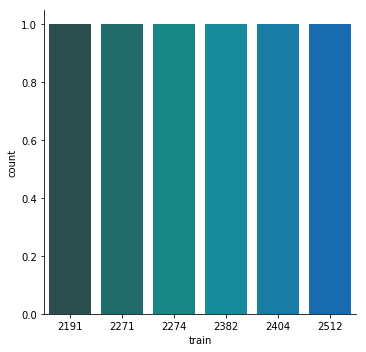

In [0]:
sns.factorplot('train',data=data_clas,kind="count",palette='winter_d')

**Preprocessing and rescale**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                  )

val_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                  )

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(300, 300), 
                                                    batch_size=128,  class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(val_dir, target_size=(300, 300), 
                                                    batch_size=128,  class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

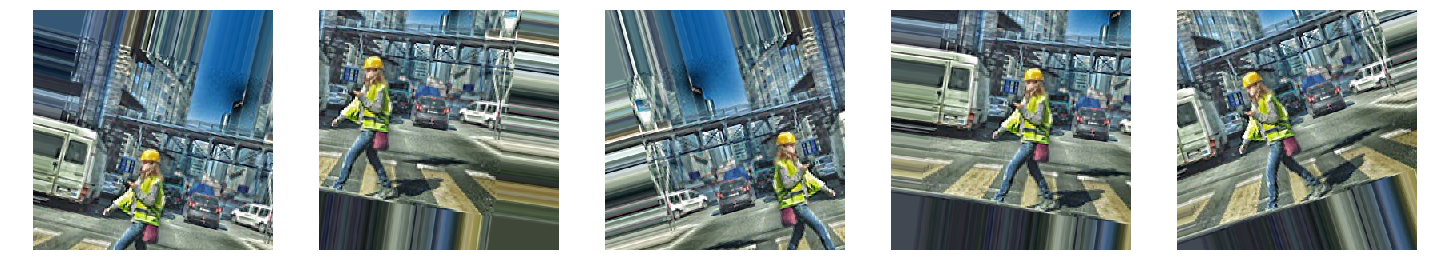

In [0]:
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Model Creation**

Steps are:
* Build the model,
* Define the loss function and the optimizer,
* Compile the model,
* Fit the data to the model,
* Predict a new image,
* Save the model

In [0]:
class classificator (tf.keras.Model):
    
    def __init__(self):
       
        super(classificator, self).__init__()
        
        self.conv_1        = Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=(300, 300, 3)) 
        self.max_pool_1    = MaxPooling2D(pool_size=(2, 2))
        self.conv_2        = Conv2D(16, kernel_size=(3, 3), activation='relu') 
        self.max_pool_2    = MaxPooling2D(pool_size=(2, 2))
        self.Dropout_0     = Dropout(0.3)
        
        self.conv_3        = Conv2D(32, kernel_size=(3, 3), activation='relu') 
        self.max_pool_3    = MaxPooling2D(pool_size=(2, 2))   
        self.Dropout_1     = Dropout(0.3)
        
        self.conv_4        = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_4    = MaxPooling2D(pool_size=(2, 2)) 
        self.Dropout_2     = Dropout(0.3)
        
        self.conv_5        = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_5    = MaxPooling2D(pool_size=(2, 2))      
        self.Dropout_3     = Dropout(0.2)
        
  
        self.flatten       = tf.keras.layers.Flatten()
 
        self.dense_1       = tf.keras.layers.Dense(units=128, activation='relu')
        self.dense_2       = tf.keras.layers.Dense(units=64, activation='relu')
        self.dense_3       = tf.keras.layers.Dense(units=6, activation='sigmoid')
        
    def call(self, inputs):

        x = self.max_pool_1(self.conv_1(inputs))
        x = self.max_pool_2(self.conv_2(x))
        x = self.Dropout_0(x)
        
        x = self.max_pool_3(self.conv_3(x))
        
        x = self.Dropout_1(x) 
        
        x = self.max_pool_4(self.conv_4(x))
        x = self.Dropout_3(x)
        
        x = self.max_pool_5(self.conv_5(x))
        
        
        x = self.flatten(x)
        x = self.dense_1(x)     
      # x = self.dense_2(x)
        x = self.dense_3(x)
        
        return x

In [0]:
model = classificator()

In [0]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)

In [0]:
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['acc'])

In [0]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=5,
                              verbose=1)

Train for 110 steps, validate for 24 steps
Epoch 1/5
110/110 [==============================] - 884s 8s/step - loss: 1.4247 - acc: 0.4351 - val_loss: 1.2850 - val_acc: 0.5453
Epoch 2/5
110/110 [==============================] - 874s 8s/step - loss: 1.1373 - acc: 0.5547 - val_loss: 1.1209 - val_acc: 0.5693
Epoch 3/5
110/110 [==============================] - 871s 8s/step - loss: 1.0235 - acc: 0.5964 - val_loss: 1.0275 - val_acc: 0.6247
Epoch 4/5
110/110 [==============================] - 890s 8s/step - loss: 0.9289 - acc: 0.6390 - val_loss: 1.0730 - val_acc: 0.5867
Epoch 5/5
110/110 [==============================] - 877s 8s/step - loss: 0.8676 - acc: 0.6677 - val_loss: 0.9167 - val_acc: 0.6550


In [0]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

<Figure size 432x288 with 0 Axes>

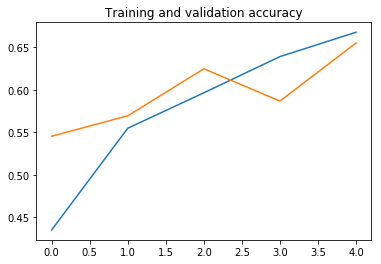

<Figure size 432x288 with 0 Axes>

In [0]:
epochs   = range(len(acc))
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

Text(0.5, 1.0, 'Training and validation loss')

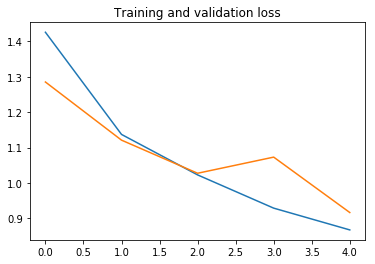

In [0]:
epochs   = range(len(acc))
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [0]:
test_img_dir = os.path.join(test_dir)
test_img = os.listdir(test_dir)
print(test_img_dir)

../input/intel-image-classification/seg_pred/seg_pred


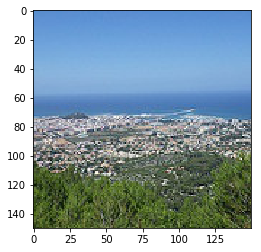

In [0]:
test_path = os.path.join(test_img_dir, test_img[25]) 
img = mpimg.imread(test_path)
plt.imshow(img)

In [0]:
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
img = image.load_img(test_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

In [0]:
classes = np.argmax(model.predict(images))

In [0]:
if classes == 0:
    print("the predict class is buildings")
elif classes ==1:
    print("the predict class is forest")
elif classes ==2:
    print("the predict class is glacier")
elif classes ==3:
    print("the predict class is mountain")
elif classes ==4:
    print("the predict class is sea")
elif classes ==5:
    print("the predict class is street")

the predict class is mountain


In [0]:
my_model = "intel_image_classification"

In [0]:
tf.saved_model.save(model, my_model)

In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(my_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [0]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [0]:
labels = ['buildings', 'forest','glacier', 'mountain', 'sea', 'street']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))